In [ ]:
import os
import zipfile
import pickle
import h5py
import cv2
from google.colab.patches import cv2_imshow
%matplotlib inline

In [ ]:
import scipy as sp
import numpy as np
import pandas as pd
import PIL
import scipy.ndimage as spi
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cd '/content/drive/MyDrive/Colab Notebooks/dataset'

In [ ]:
if not os.path.exists('/content/drive/My Drive/Colab Notebooks/dataset'):
  os.mkdir('/content/drive/My Drive/Colab Notebooks/dataset')

In [ ]:
!pwd

In [ ]:
!ls '/content/drive/My Drive/Colab Notebooks/dataset/'

In [ ]:
!cat '/content/drive/My Drive/Colab Notebooks/dataset/README.txt'

This brain tumor dataset containing 3064 T1-weighted contrast-inhanced images
from 233 patients with three kinds of brain tumor: meningioma (708 slices), 
glioma (1426 slices), and pituitary tumor (930 slices). Due to the file size
limit of repository, we split the whole dataset into 4 subsets, and achive 
them in 4 .zip files with each .zip file containing 766 slices.The 5-fold
cross-validation indices are also provided.

-----
This data is organized in matlab data format (.mat file). Each file stores a struct
containing the following fields for an image:

cjdata.label: 1 for meningioma, 2 for glioma, 3 for pituitary tumor
cjdata.PID: patient ID
cjdata.image: image data
cjdata.tumorBorder: a vector storing the coordinates of discrete points on tumor border.
		For example, [x1, y1, x2, y2,...] in which x1, y1 are planar coordinates on tumor border.
		It was generated by manually delineating the tumor border. So we can use it to generate
		binary image of tumor mask.
cjdata.tumorMask: a

In [ ]:
with zipfile.ZipFile('/content/drive/My Drive/Colab Notebooks/dataset/brainTumorDataPublic_1766.zip') as zf:
  if not os.path.exists('/content/drive/My Drive/Colab Notebooks/dataset/bt_set1'):
    os.mkdir('/content/drive/My Drive/Colab Notebooks/dataset/bt_set1')
    zip_dir = zf.namelist()[0]
    zf.extractall('/content/drive/My Drive/Colab Notebooks/dataset/bt_set1')

In [ ]:
with zipfile.ZipFile('/content/drive/My Drive/Colab Notebooks/dataset/brainTumorDataPublic_7671532.zip') as zf:
  if not os.path.exists('/content/drive/My Drive/Colab Notebooks/dataset/bt_set2'):
    os.mkdir('/content/drive/My Drive/Colab Notebooks/dataset/bt_set2')
    zip_dir = zf.namelist()[0]
    zf.extractall('/content/drive/My Drive/Colab Notebooks/dataset/bt_set2')

In [ ]:
with zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/dataset/brainTumorDataPublic_15332298.zip') as zf:
  if not os.path.exists('/content/drive/My Drive/Colab Notebooks/dataset/bt_set3'):
    os.mkdir('/content/drive/My Drive/Colab Notebooks/dataset/bt_set3')
    zip_dir = zf.namelist()[0]
    zf.extractall('/content/drive/My Drive/Colab Notebooks/dataset/bt_set3')

In [ ]:
with zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/dataset/brainTumorDataPublic_22993064.zip') as zf:
  if not os.path.exists('/content/drive/My Drive/Colab Notebooks/dataset/bt_set4'):
    os.mkdir('/content/drive/My Drive/Colab Notebooks/dataset/bt_set4')
    zip_dir = zf.namelist()[0]
    zf.extractall('/content/drive/My Drive/Colab Notebooks/dataset/bt_set4')

In [ ]:
if not os.path.exists('/content/drive/My Drive/Colab Notebooks/dataset/imageData'):
  os.mkdir('/content/drive/My Drive/Colab Notebooks/dataset/imageData')
  !mv /content/drive/'My Drive'/'Colab Notebooks'/dataset/bt_set1/*.mat '/content/drive/My Drive/Colab Notebooks/dataset/imageData/'
  !mv /content/drive/'My Drive'/'Colab Notebooks'/dataset/bt_set2/*.mat '/content/drive/My Drive/Colab Notebooks/dataset/imageData/'
  !mv /content/drive/'My Drive'/'Colab Notebooks'/dataset/bt_set3/*.mat '/content/drive/My Drive/Colab Notebooks/dataset/imageData/'
  !mv /content/drive/'My Drive'/'Colab Notebooks'/dataset/bt_set4/*.mat '/content/drive/My Drive/Colab Notebooks/dataset/imageData/'

In [ ]:
def show_image(FILE):
  if(int(FILE) > 3064):
    print('file does not exist')
    return
  with h5py.File(f"/content/drive/My Drive/Colab Notebooks/dataset/imageData/" +FILE +".mat", 'r') as f:
      
      img = f['cjdata']['image']
      label = f['cjdata']['label'][0][0]
      tumorBorder = f['cjdata']['tumorBorder'][0]
      mask = f['cjdata']['tumorMask']
      
      img = np.array(img, dtype=np.float32)
      img = img/255
      mask = np.array(mask, dtype=np.float32)
      mask = mask/255
      fig, axes = plt.subplots(1, 2, figsize=(4, 5))
      ax1 = axes[0]
      ax2 = axes[1]
      ax1 = plt.subplot(2,2,1)
      #print(img)
      ax1.set_title(f"Image ")
      ax = plt.axis('off')
      ax1 = plt.imshow(img, cmap='gray')
      #ax1.set(title='Brain Image')
      #fig2 = plt.figure(figsize=(10, 6))
      ax2 = plt.subplot(2,2,2)
      ax2.set_title(f'Mask  ' )
      ax2 = plt.axis('off')
      ax2 = plt.imshow(mask, cmap='gray')
      
      #ax2.set(title = 'Mask Image')
      #print("Image shape: ", img.shape)
      print("Label", label)
      #print("Tumer Border Coords: ", tumorBorder)
      #print("Mask shape: ", mask.shape)
      

Label 1.0


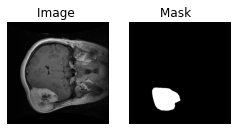

In [ ]:
show_image('306')


In [ ]:
def print_image(FILE):
  if(int(FILE) > 3064):
    print('file does not exist')
    return
  with h5py.File(f"/content/drive/My Drive/Colab Notebooks/dataset/imageData/" +FILE +".mat", 'r') as f:
      for key in f.keys():
        print(key)
      for item in f.items():
        print(item)
      for key, val in f['cjdata'].items():
        print(key, val)
      img = f['cjdata']['image']
      label = f['cjdata']['label'][0][0]
      tumorBorder = f['cjdata']['tumorBorder'][0]
      mask = f['cjdata']['tumorMask']
      
      
      
      
      print("Image shape: ", img.shape)
      print("Label", label)
      print("Tumer Border Coords: ", tumorBorder)
      print("Mask shape: ", mask.shape)
      

Label 1.0
cjdata
('cjdata', <HDF5 group "/cjdata" (5 members)>)
PID <HDF5 dataset "PID": shape (6, 1), type "<u2">
image <HDF5 dataset "image": shape (512, 512), type "<i2">
label <HDF5 dataset "label": shape (1, 1), type "<f8">
tumorBorder <HDF5 dataset "tumorBorder": shape (1, 76), type "<f8">
tumorMask <HDF5 dataset "tumorMask": shape (512, 512), type "|u1">
Image shape:  (512, 512)
Label 1.0
Tumer Border Coords:  [190.24168014  98.67675932 187.5747407  106.67757765 188.0192306
 113.34492625 190.24168014 120.01227485 192.01963977 127.56860327
 196.02004893 137.34738122 198.24249846 141.34779038 200.9094379
 142.2367702  206.24331679 143.57023992 216.46658464 142.6812601
 224.02291306 140.01432066 229.80128185 139.56983076 234.69067082
 136.90289131 240.46903961 133.79146197 244.91393868 132.90248215
 248.02536803 130.23554271 252.4702671  127.56860327 258.24863589
 128.01309318 261.80455514 125.79064364 260.91557533 117.34533541
 260.47108542 108.90002718 258.6931258   98.67675932 2

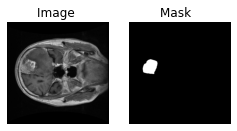

In [ ]:
show_image('365')
print_image('365')

In [ ]:

if not os.path.exists('/content/drive/My Drive/Colab Notebooks/dataset/bt_images'):
  os.mkdir('/content/drive/My Drive/Colab Notebooks/dataset/bt_images') 

In [ ]:
labels = []
training_data = []

3064 files successfully saved as Training Data


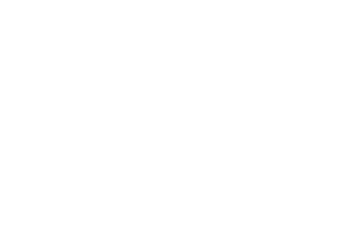

In [ ]:
file = None
img = None
label = None
for file in range(1, 3065):
  with h5py.File('/content/drive/My Drive/Colab Notebooks/dataset/imageData/{}.mat'.format(file), 'r') as f:
      img = f['cjdata']['image']
      label = f['cjdata']['label'][0][0]
      
      #training_data.append([img, int(label)])

      labels.append(int(label))
      
      #border.append(coord)
      img = np.array(img, dtype=np.float32)
      
      plt.axis('off')
      plt.imsave("/content/drive/My Drive/Colab Notebooks/dataset/bt_images/{}.jpg".format(file), img, cmap='gray')
      
      
print("{} files successfully saved as Training Data".format(file))

In [ ]:
if not os.path.exists('/content/drive/My Drive/Colab Notebooks/pickle_bt'):
  os.mkdir('/content/drive/My Drive/Colab Notebooks/pickle_bt') 

In [ ]:
if not os.path.exists('/content/drive/MyDrive/Colab Notebooks/dataset/BrainTumor/meningioma'):
  os.mkdir('/content/drive/My Drive/Colab Notebooks/dataset/BrainTumor/meningioma/') 
if not os.path.exists('/content/drive/My Drive/Colab Notebooks/dataset/BrainTumor/glioma/'):
  os.mkdir('/content/drive/My Drive/Colab Notebooks/dataset/BrainTumor/glioma/') 
if not os.path.exists('/content/drive/My Drive/Colab Notebooks/dataset/BrainTumor/pituitary/'):
  os.mkdir('/content/drive/My Drive/Colab Notebooks/dataset/BrainTumor/pituitary/') 

In [ ]:
len(training_data)

3064

In [ ]:
label_names = np.array(labels, dtype=np.int64)

In [ ]:
def resize_image(img, size=(28,28)):

    h, w = img.shape[:2]
    c = img.shape[2] if len(img.shape)>2 else 1

    if h == w: 
        return cv2.resize(img, size, cv2.INTER_AREA)

    dif = h if h > w else w

    interpolation = cv2.INTER_AREA if dif > (size[0]+size[1])//2 else cv2.INTER_CUBIC

    x_pos = (dif - w)//2
    y_pos = (dif - h)//2

    if len(img.shape) == 2:
        mask = np.zeros((dif, dif), dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w] = img[:h, :w]
    else:
        mask = np.zeros((dif, dif, c), dtype=img.dtype)
        mask[y_pos:y_pos+h, x_pos:x_pos+w, :] = img[:h, :w, :]

    return cv2.resize(mask, size, interpolation)

In [ ]:
#training_data = []
img = None
label = None
i = None
for i in range(1, 3065):
  img = cv2.imread("/content/drive/My Drive/Colab Notebooks/dataset/bt_images/{}.jpg".format(i), cv2.IMREAD_GRAYSCALE)
  img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
  img = resize_image(img, size = (256, 256))
  label = label_names[i-1]
  if(label) == 1:
    plt.imsave("/content/drive/My Drive/Colab Notebooks/dataset/BrainTumor/meningioma/{}.jpg".format(i), img, cmap='gray')
  if(label) == 2:
    plt.imsave("/content/drive/My Drive/Colab Notebooks/dataset/BrainTumor/glioma/{}.jpg".format(i), img, cmap='gray')
  if(label) == 3:
    plt.imsave("/content/drive/My Drive/Colab Notebooks/dataset/BrainTumor/pituitary/{}.jpg".format(i), img, cmap='gray')
  
  #training_data.append([img, label])

print("shape: {} label: {} | {} samples successfully preprocessed".format(img.shape, label, i))


shape: (256, 256, 3) label: 1 | 3064 samples successfully preprocessed


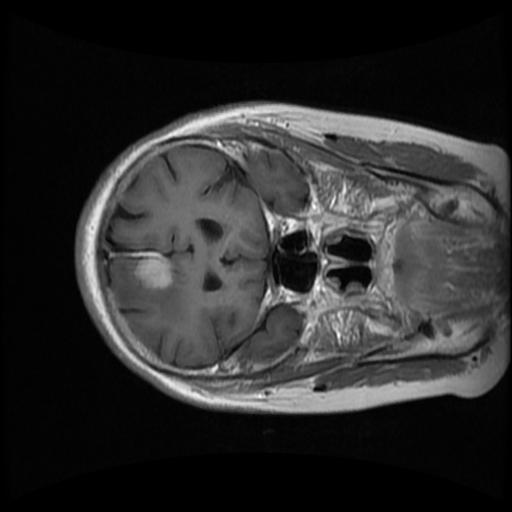

In [ ]:
cv2_imshow(img)

In [ ]:
#len(training_data)
len(label_names)

3064